<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
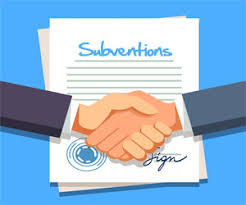 </td>
  </tr>
</table> 
</div>

<center><h1> Analyse des données de subventions  </h1></center>
<br/>
<center> Solène Cochennec, Jaime Costa Centena </center>

## Table of Contents


0. [Introduction](#intro)<br>
1. [Data Analysis](#Data-Prep) <br>

Le but de ce projet est de travailler sur la data visualization des subventions accordées aux associations par la ville de Paris. Pour ce faire, nous travaillerons sur les données disponibles sur le site https://opendata.paris.fr,, avec un jeu de donnée de subventions acceptées et refusées.



### Télécharger les données  

Link to the date: https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/export/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association

#### Quelques détails sur le dataset
Ne sont pas retracées les subventions des organismes non associatifs (SCOP, SCIC, fondation de coopération scientifique, sociétés d’économie mixte, établissements publics, etc), ni les aides financières imputées sur des lignes budgétaires autres que les subventions (participations, adhésions, cotisations, etc). Les contributions non financières (locaux, mise à disposition de terrains, de personnels, de panneaux d’information, de matériel, etc) n’y sont pas incluses.




#### Variables 

Le dataset est composé de 10 variables : 
- $\textbf{Année budgétaire}$ (`annee_vote`): année du vote de la subvention, qui ne correspond pas nécessairement à l’année de l’imputation budgétaire ou à l’année du versement réel de la subvention.
- $\textbf{Collectivité}$ (`collectivite`) : Ville ou Département (de 2013 à 2018).
- $\textbf{Nom Bénéficiaire}$ (`nom_beneficiaire`) : nom de l’association effectuant la demande de subvention.
- $\textbf{Numéro Siret}$ (`siret`) : numéro SIRET tel que déclaré par l’association (Le SIREN de la Ville de Paris est le 217 500 016 et celui du Département de Paris le 227 500 055).
- $\textbf{Objet du dossier}$  (`objet`): Intitulé du ou des projets déposés en faveur duquel (desquels) une subvention est sollicitée.
- $\textbf{Montant voté}$ (`montant`) : Montant de la subvention votée  par le Conseil de Paris, sachant que dans certains cas, la Ville de Paris a mutualisé plusieurs projets et accordé une subvention forfaitaire globale qui a été rattachée pour ordre à l’un des projets faute de pouvoir détailler la subvention sur chaque projet précis. L’absence d’un montant chiffré dans la colonne « montant voté » correspond à une demande de subvention défavorablement arbitrée.
- $\textbf{Direction}$ (`direction`): direction de la ville pilotant la demande de subvention (voir ci-après pour la signification des sigles des différentes directions), sachant que dans certains cas, plusieurs directions peuvent co-financer le même projet.
- $\textbf{Nature de la subvention}$ (`type_subvention`) : 
    - Investissement : finance les biens durables et les travaux qui constituent le patrimoine de l’association.
    - Fonctionnement :
        - Pour le fonctionnement annuel de l’association.
        - Pour le financement du ou des projet.s conduits par l’association.
        - Pour le financement d’une action dans le cadre d’un appel à projet de la Ville de Paris (ou du Département de Paris de 2013 à 2018).
        
- $\textbf{Secteur d'activité}$ (`activite_association`): secteur(s) choisi(s) par les associations au moment de son inscription dans le service numérique Paris Asso, dans la limite de 3


Les différentes directions de la ville de Paris sont détaillées sur le lien suivant : https://opendata.paris.fr/explore/dataset/subventions-accordees-et-refusees/information/?disjunctive.collectivite&disjunctive.nom_beneficiaire&disjunctive.direction&disjunctive.secteurs_d_activites_definies_par_l_association

### Recupérer les données 

In [9]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [10]:
from data_cleaning import preparation_data

In [11]:
path = '/Users/solene/Desktop/Projet/Data/' ## Path Solene

df_subventions = preparation_data(path)

In [12]:
df_subventions.head()

,id,annee,collectivite,nom_beneficiaire,siret,objet,montant,direction,type_subvention,activite_association
0,2017_04920,2017,Ville de Paris,MULTI'COLORS,45355810800016,"aap pvi LIEN SOCIAL au Refuge urbain python: ""...",2000,DEVE,Projet,Culture & Arts;Environnement & écologie;Social
1,2016_08398,2017,Ville de Paris,MULTI-DECOUVERTES,81396408700015,démarrage de l'activité,800,DJS,Fonctionnement,Culture & Arts;Loisirs;Sport
2,2017_07855,2017,Ville de Paris,MUSÉE D'ART ET D'HISTOIRE DU JUDAÏSME,34843510800017,Subvention d'investissement : mise en place d'...,50000,DAC,Investissement,Culture & Arts;Education & formation;Mémoire
3,2017_05731,2017,Ville de Paris,MUSICA ANDALUCIA,48223420000020,TAP 2017 Atelier Théâtre musical,4950,DASCO,Fonctionnement,Culture & Arts
4,2017_04795,2017,Ville de Paris,MUSIQUES ET CULTURES DIGITALES,49313113000020,"Ateliers ""EnReportagePermanent"" 2017",0,DDCT,Non précisée,Communication & média;Culture & Arts;Mémoire


In [13]:
df_subventions.shape

(59584, 10)

In [14]:
df_subventions.isna().sum() / df_subventions.shape[0]

id                      0.000000
annee                   0.000000
collectivite            0.000000
nom_beneficiaire        0.000352
siret                   0.002652
objet                   0.000000
montant                 0.000000
direction               0.000000
type_subvention         0.000000
activite_association    0.000503
dtype: float64

In [15]:
df_subventions.dtypes

id                      object
annee                    int64
collectivite            object
nom_beneficiaire        object
siret                   object
objet                   object
montant                  int64
direction               object
type_subvention         object
activite_association    object
dtype: object